# 线性回归 - Linear Regreesion

此Notebook是配合Andrew Ng "Machine Leanring"中[线性回归](https://github.com/loveunk/machine-learning-deep-learning-notes/blob/master/machine-learning/linear-regression.md)部分学习使用。

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv('D:\\机器学习\\线性回归\\ex1data1.txt', names=['population', 'profit']) # 读取数据并赋予列名
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [66]:
df.head() # 显示数据前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [67]:
df.info() # 打印df的class信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [68]:
df.describe() # 打印df的统计信息

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


***
# 看下原始数据

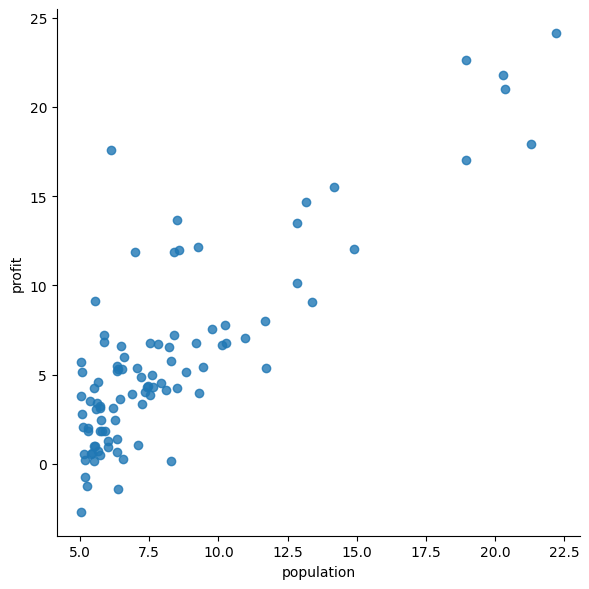

In [69]:
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)  #由于版本更新，不要再用size,用height
#fit_reg=False: 这是一个开关参数。
# True (默认)：Seaborn 会自动计算并绘制出一条线性回归拟合线及其置信区间。
# False：只绘制原始数据的散点，不显示拟合直线。当你只想观察原始分布（即第一步的 Scatter Plot）时常用此项
plt.show()

In [70]:
def get_X(df): # 读取特征
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[ :, :-1].values  # 这个操作返回 ndarray,不是矩阵
#    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
#     data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
#     return data.iloc[:, :-1].values 

def get_y(df):#读取标签
    return np.array(df.iloc[ : , -1])#df.iloc[:, -1]是指df的最后一列

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放

多变量的假设 h 表示为：${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$。

这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  ${{h}_{\theta }}\left( x \right)={{\theta }_{0}x_0}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$。

此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

其中：

$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [71]:
# 查看数据维度
data = df
X = get_X(data)
print(X.shape, type(X))
y = get_y(data)
print(y.shape, type(y))


(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [72]:
theta = np.zeros(X.shape[1]) # X.shape[1]=2, 代表特征数n，其实就是分配权重
print(theta)

[0. 0.]


In [73]:
def lr_cost(theta, X, y):
    """ 计算代价函数
    X: R(m*n), m 样本数, n 特征数
    y: R(m)
    theta : R(n), 线性回归的参数
    """
    m = X.shape[0]#m为样本数

    inner = X @ theta.T - y  
    # 出来的结果 numpy自己转化为 一维数组
   # print(inner)
    square_sum = inner @ inner.T
    cost = square_sum / (2 * m)

    return cost

In [74]:

lr_cost(theta, X, y) # 返回cost的值

np.float64(32.072733877455676)

# 批量梯度下降 - Batch Gradient Decent
$$\begin{aligned}{{\theta }_{j}} &:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right) \\ &:= {{\theta }_{j}}-\alpha \frac{1}{m} \sum^{m}_{i=1}\left( h_\theta \left(x^{(i)}\right) -y^{(i)}  \right)x^{(i)}_j \end{aligned}$$
注意：对于所有的$j$，需要同时更新$\theta_j$。

In [ ]:
def gradient(theta, X, y):
  """
  计算梯度，也就是 J(θ)的偏导数
  """
  m = X.shape[0]

  inner = X.T  @  ( (X @ theta.T - y).T )  

  return inner / m

In [ ]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
  """
  批量梯度下降函数。拟合线性回归，返回参数和代价
  epoch: 批处理的轮数
  alpha: 学习率
  """
  cost_data = [lr_cost(theta, X, y)]
  _theta = theta.copy()  

  for _ in range(0,epoch,1) :
    _theta = _theta - alpha * gradient(_theta,X,y)
    cost_data.append(lr_cost(_theta,X,y))
  return _theta, cost_data

In [92]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [93]:
final_theta
#最终的theta

array([-2.28286727,  1.03099898])

In [94]:
cost_data
# 看下代价数据

[np.float64(32.072733877455676),
 np.float64(6.737190464870009),
 np.float64(5.931593568604956),
 np.float64(5.901154707081388),
 np.float64(5.895228586444221),
 np.float64(5.890094943117332),
 np.float64(5.885004158443646),
 np.float64(5.8799324804914175),
 np.float64(5.874879094762575),
 np.float64(5.869843911806386),
 np.float64(5.864826865312929),
 np.float64(5.859827889932181),
 np.float64(5.85484692057229),
 np.float64(5.849883892376587),
 np.float64(5.844938740722034),
 np.float64(5.840011401218361),
 np.float64(5.835101809707226),
 np.float64(5.830209902261388),
 np.float64(5.825335615183862),
 np.float64(5.820478885007099),
 np.float64(5.815639648492152),
 np.float64(5.810817842627869),
 np.float64(5.806013404630044),
 np.float64(5.801226271940628),
 np.float64(5.796456382226899),
 np.float64(5.7917036733806535),
 np.float64(5.786968083517396),
 np.float64(5.782249550975539),
 np.float64(5.777548014315596),
 np.float64(5.772863412319381),
 np.float64(5.768195683989212),
 np.fl

In [95]:
# 计算最终的代价
lr_cost(final_theta, X, y)

np.float64(4.713809531116866)

scikit-learn model的预测表现

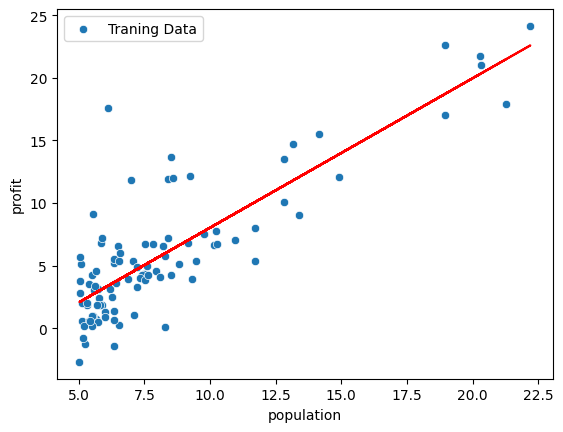

In [106]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
x = X[:, 1]
f = model.predict(X).flatten()   # flattten 是把 数组压平的意思
sns.scatterplot(data, x = 'population', y = 'profit' , label = 'Traning Data')
plt.plot(x,f,label = 'prediction_line',color = 'red')
plt.show()

# 代价数据可视化

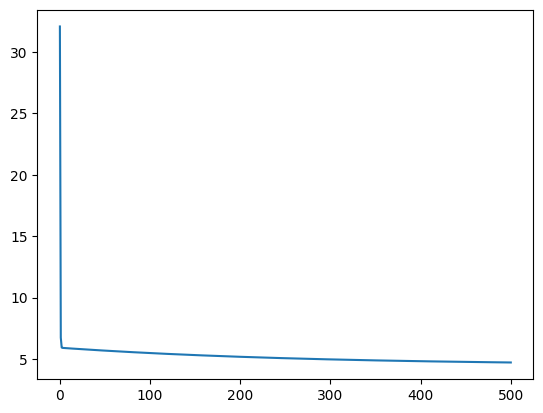

In [119]:
time = np.zeros(epoch + 1)
for i in range(0,epoch + 1,1) :
    time[i] = i
plt.plot(time,cost_data)

# 3- 选修章节

In [120]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 标准化数据
最简单的方法是令：

 

其中  是平均值，sn 是标准差。


In [122]:
def normalize_feature(df) :
    return df.apply(lambda column : ( column - column.mean() ) / column.std() )

In [123]:
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# 2. 多变量批量梯度下降 -  Multi-var batch gradient decent

In [124]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y)) #看下数据的维度和类型

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [125]:
alpha = 0.01 #学习率
theta = np.zeros(X.shape[1]) #X.shape[1]：特征数n
epoch = 500  #迭代次数

In [126]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

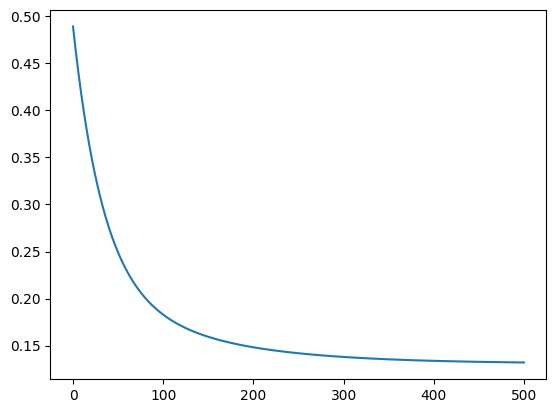

In [129]:
plt.plot(time,cost_data)
plt.show()

In [128]:
final_theta

array([-1.16679716e-16,  8.30383883e-01,  8.23982853e-04])

Scikit-learn 的预测

<Axes: xlabel='square', ylabel='price'>

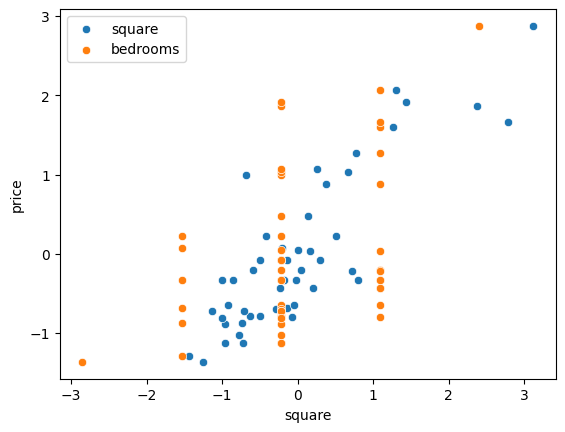

In [134]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
f = model.predict(X).flatten()
'square', 'bedrooms', 'price'
sns.scatterplot(data, x = 'square', y = 'price',label = 'square')
sns.scatterplot(data, x = 'bedrooms', y = 'price',label = 'bedrooms')

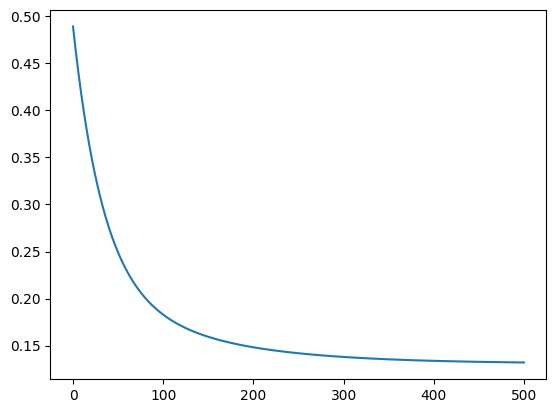

In [135]:
plt.plot(time,cost_data)
plt.show()

# 3. 学习率 - Learning rate

In [140]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate([base, base*3]))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


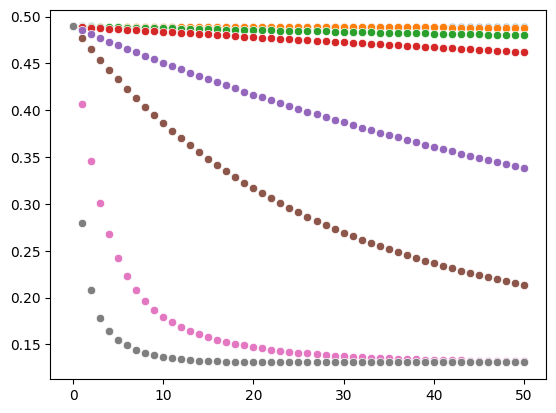

In [143]:
epoch=50

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    sns.scatterplot(x = np.arange(0,epoch+1,1), y = cost_data)
plt.show()

可以看到最合适的learning rate是0.3